,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


,Date,P/E,P/B,Div Yield %
0,12 Aug 2022,21.18,4.15,1.35
1,11 Aug 2022,21.29,4.18,1.36
2,10 Aug 2022,21.11,4.21,1.34
3,08 Aug 2022,21.02,4.21,1.33
4,05 Aug 2022,20.86,4.18,1.29


,Date,INR
0,02/01/1979,14.7
1,03/01/1979,14.7
2,04/01/1979,14.8
3,05/01/1979,15.1
4,08/01/1979,15.1


,Date,Open,High,Low,Close,Volume,Adj Close,P/E,P/B,Div Yield %,INR
0,1979-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.7
1,1979-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.7
2,1979-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
3,1979-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.1
4,1979-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.1


Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.1069
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0016
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0016
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0015
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0015
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0013
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0013
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0013
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0014
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0013
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0011
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0013
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0011
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0011
Epoch 15/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0010
Epo

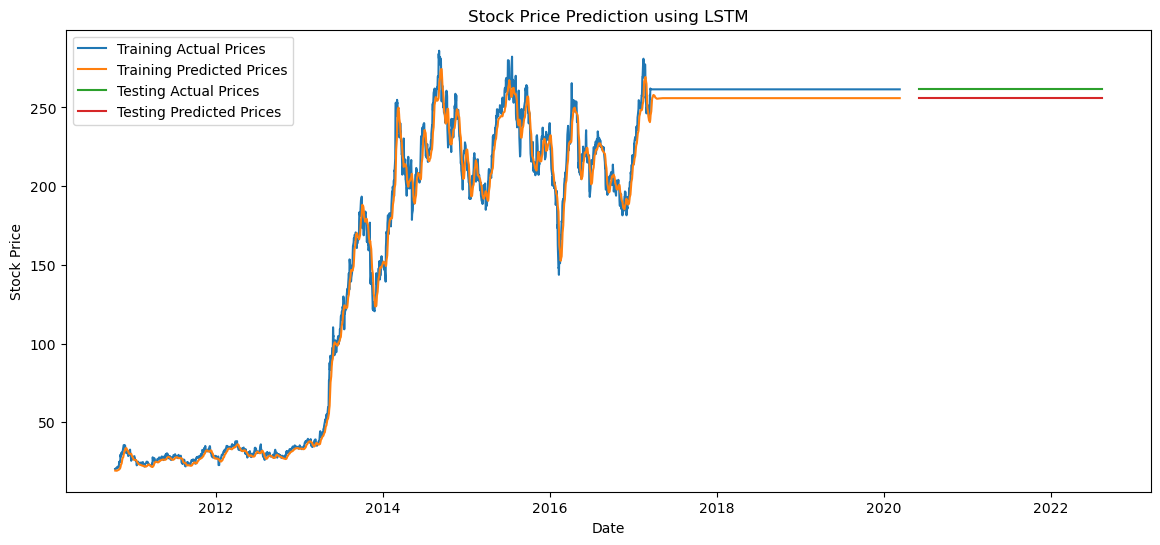

In [50]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

#Loading Datasets
tesla_data = pd.read_csv('C:/Users/hp/Downloads/Tesla.csv')
nifty_data = pd.read_csv('C:/Users/hp/Downloads/NIFTY 50 - HistoricalPE_PBDIV_Data.csv')
gold_data = pd.read_csv('C:/Users/hp/Downloads/Gold price INR.csv')

# Displaying the first few rows of each dataset
display(tesla_data.head(), nifty_data.head(), gold_data.head())

#Data Preprocessing - Date Formatting
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'], format='%m/%d/%Y')
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'], format='%d %b %Y')
gold_data['Date'] = pd.to_datetime(gold_data['Date'], format='%d/%m/%Y')

# Merging the Datasets
merged_data = pd.merge(tesla_data, nifty_data, on='Date', how='outer')
merged_data = pd.merge(merged_data, gold_data, on='Date', how='outer')
merged_data.sort_values('Date', inplace=True)

# Filling missing values
merged_data.fillna(method='ffill', inplace=True)

# Display the merged data
display(merged_data.head())

#Feature Engineering - Adding Indicators
merged_data['Daily Return'] = merged_data['Close'].pct_change()
merged_data['5-Day MA'] = merged_data['Close'].rolling(window=5).mean()
merged_data['20-Day MA'] = merged_data['Close'].rolling(window=20).mean()
merged_data['20-Day StdDev'] = merged_data['Close'].rolling(window=20).std()
merged_data['Upper Band'] = merged_data['20-Day MA'] + (merged_data['20-Day StdDev'] * 2)
merged_data['Lower Band'] = merged_data['20-Day MA'] - (merged_data['20-Day StdDev'] * 2)

# Drop NaN values from rolling calculations
merged_data.dropna(inplace=True)

# Data Preparation
data = merged_data[['Date', 'Close']].copy() # Select the 'Close' column for prediction
data.set_index('Date', inplace=True)

# Normalizing the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Spliting data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Creating Dataset for LSTM Model
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# Generating LSTM time-series data with a lookback period of 60 days
time_step = 60
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Reshaping input to be [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#Building the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Training Model
model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=1)

# Make Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform to get actual stock prices
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

#Corrected Visualization of Predictions
plt.figure(figsize=(14, 6))

# Plotting the training data (Actual vs. Predicted)
plt.plot(data.index[time_step:len(Y_train) + time_step], Y_train, label='Training Actual Prices')
plt.plot(data.index[time_step:len(train_predict) + time_step], train_predict, label='Training Predicted Prices')

# Correct the indices for testing data to match the length
plt.plot(data.index[len(Y_train) + (time_step * 2) + 1:len(Y_train) + (time_step * 2) + 1 + len(Y_test)],
         Y_test, label='Testing Actual Prices')
plt.plot(data.index[len(Y_train) + (time_step * 2) + 1:len(Y_train) + (time_step * 2) + 1 + len(test_predict)],
         test_predict, label='Testing Predicted Prices')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.show()



Training RMSE: 7.458572146310228
Testing RMSE: 5.5885009765625


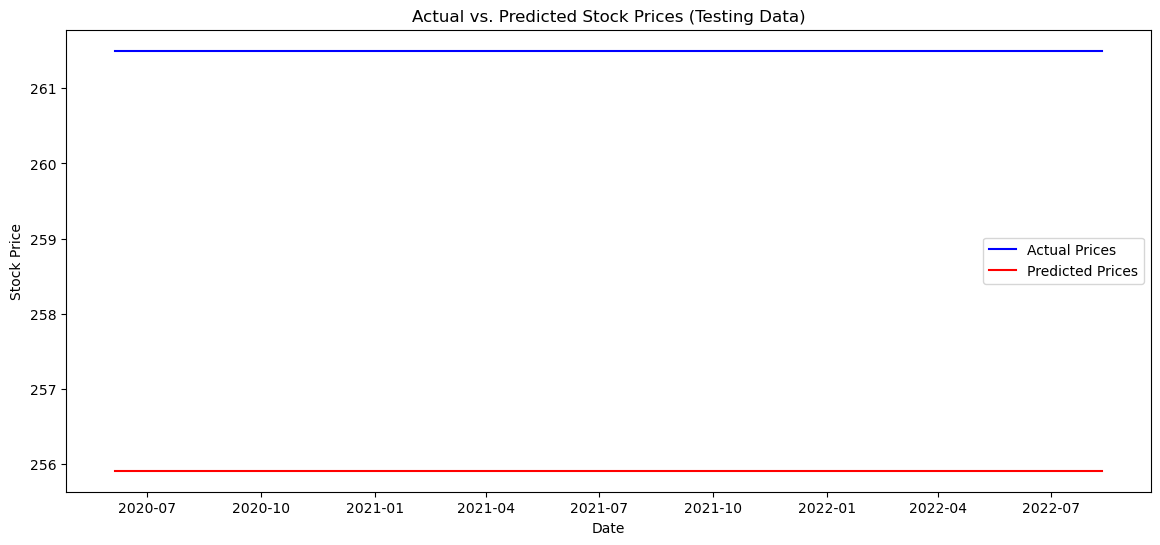

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


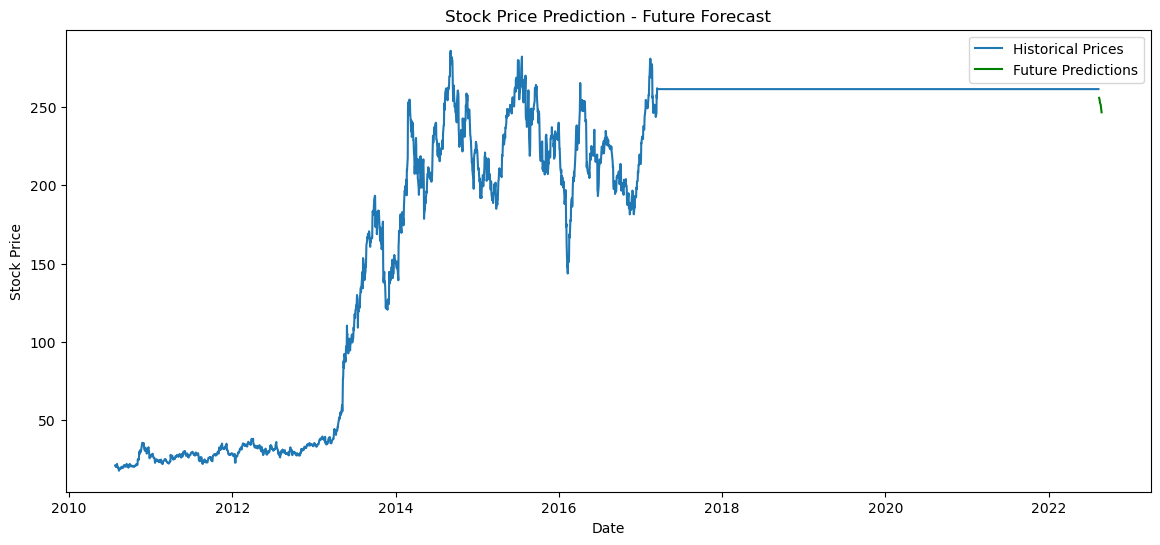

Model saved as 'stock_lstm_model.h5'


In [52]:
# Model Performance Evaluation
from sklearn.metrics import mean_squared_error
import math

# Calculate RMSE for training and testing datasets
train_rmse = math.sqrt(mean_squared_error(Y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(Y_test, test_predict))

print(f"Training RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")

# Visualizing Actual vs. Predicted Prices for Testing Data
plt.figure(figsize=(14,6))
test_index = data.index[len(Y_train) + (time_step*2) + 1 : len(Y_train) + (time_step*2) + 1 + len(Y_test)]

plt.plot(test_index, Y_test, color='blue', label='Actual Prices')
plt.plot(test_index, test_predict, color='red', label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices (Testing Data)')
plt.legend()
plt.show()


#Forecast Future Stock Prices using the LSTM Model
last_data = test_data[-time_step:].reshape(1, time_step, 1)

# Forecast the next 10 days
future_predictions = []
for i in range(10):
    pred = model.predict(last_data)
    future_predictions.append(pred[0,0])
    

    pred_reshaped = np.reshape(pred, (1, 1, 1))  # Reshape pred to match dimensions
    last_data = np.append(last_data[:, 1:, :], pred_reshaped, axis=1)

# Inverse transform to get the actual stock prices
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

#Visualizing Future Forecasts
plt.figure(figsize=(14,6))
plt.plot(data.index, data['Close'], label='Historical Prices')
future_index = pd.date_range(start=data.index[-1], periods=11, freq='B')[1:]
plt.plot(future_index, future_predictions, label='Future Predictions', color='green')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction - Future Forecast')
plt.legend()
plt.show()


model.save('my_model.keras')
print("Model saved as 'stock_lstm_model.h5'")


In [62]:
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])  # Collect 'time_step' days of data as features
        Y.append(dataset[i, 0])  # The target value is the next day's closing price
    return np.array(X), np.array(Y)


In [64]:
# Create the Datasets
time_step = 60  # Define the lookback period for the LSTM
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f"X_train shape: {X_train.shape}") 
print(f"Y_train shape: {Y_train.shape}") 
print(f"X_test shape: {X_test.shape}")  
print(f"Y_test shape: {Y_test.shape}")  

#Building the LSTM Model with Hyperparameter Tuning
from tensorflow.keras.optimizers import Adam

def build_lstm_model(units, dropout_rate, learning_rate):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(time_step, 1)))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units, return_sequences=False))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Create multiple models with different configurations
units = [50, 100, 150]
dropout_rates = [0.2, 0.3, 0.4]
learning_rates = [0.001, 0.005, 0.01]

#Training the Model with Hyperparameter Tuning
for u in units:
    for d in dropout_rates:
        for lr in learning_rates:
            print(f"Training with units={u}, dropout_rate={d}, learning_rate={lr}")
            lstm_model = build_lstm_model(units=u, dropout_rate=d, learning_rate=lr)
            lstm_model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1)
            # Evaluate model performance on test data
            loss = lstm_model.evaluate(X_test, Y_test, verbose=1)
            print(f"Model performance: Loss = {loss}")


X_train shape: (2465, 60, 1)
Y_train shape: (2465,)
X_test shape: (572, 60, 1)
Y_test shape: (572,)
Training with units=50, dropout_rate=0.2, learning_rate=0.001
Epoch 1/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0662
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0018
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0026
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0016
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0019
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0015
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0013
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0013
Epoch 9/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0014
Epoch 10/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0012
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.9408e-06
Model performance: Loss = 2.9408317914203508e-06
Training with units=50, dropout_rate=0.2, learning_rate=0.005
Epoch 1

In [66]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(scaled_data):
    X_train, X_test = scaled_data[train_index], scaled_data[test_index]
    # Training the model and evaluat each split


In [68]:
#Periodic Model Updating 
def update_model(new_data):
    updated_data = pd.concat([original_data, new_data], axis=0)
    # Retrain the model
    new_X, new_Y = create_dataset(updated_data, time_step)
    lstm_model.fit(new_X, new_Y, epochs=10, batch_size=32)
    lstm_model.save("updated_stock_lstm_model.h5")


In [70]:
#Implementing GRU Model
from tensorflow.keras.layers import GRU

model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(GRU(50, return_sequences=False))
model.add(Dense(1))


In [72]:
# Check for 'Volume' column in the DataFrame
if 'Volume' not in merged_data.columns:
    merged_data['Volume'] = 0  # Using zeros as a placeholder for missing volume data
import pandas as pd
import numpy as np

# 1. Moving Average Convergence Divergence (MACD)
def calculate_macd(data, slow=26, fast=12, signal=9):
    data['EMA_12'] = data['Close'].ewm(span=fast, adjust=False).mean()
    data['EMA_26'] = data['Close'].ewm(span=slow, adjust=False).mean()
    data['MACD'] = data['EMA_12'] - data['EMA_26']
    data['Signal Line'] = data['MACD'].ewm(span=signal, adjust=False).mean()
    return data

# 2. Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))
    return data

# 3. Exponential Moving Average (EMA)
merged_data['EMA_10'] = merged_data['Close'].ewm(span=10, adjust=False).mean()

# 4. Average True Range (ATR)
def calculate_atr(data, window=14):
    data['High-Low'] = data['High'] - data['Low']
    data['High-Close'] = abs(data['High'] - data['Close'].shift(1))
    data['Low-Close'] = abs(data['Low'] - data['Close'].shift(1))
    data['True Range'] = data[['High-Low', 'High-Close', 'Low-Close']].max(axis=1)
    data['ATR'] = data['True Range'].rolling(window=window, min_periods=1).mean()
    return data

# 5. Bollinger Bands
merged_data['20-Day MA'] = merged_data['Close'].rolling(window=20).mean()
merged_data['20-Day StdDev'] = merged_data['Close'].rolling(window=20).std()
merged_data['Upper Band'] = merged_data['20-Day MA'] + (merged_data['20-Day StdDev'] * 2)
merged_data['Lower Band'] = merged_data['20-Day MA'] - (merged_data['20-Day StdDev'] * 2)

# 6. Stochastic Oscillator
def calculate_stochastic_oscillator(data, period=14):
    data['Low_Min'] = data['Low'].rolling(window=period).min()
    data['High_Max'] = data['High'].rolling(window=period).max()
    data['Stochastic Oscillator'] = 100 * ((data['Close'] - data['Low_Min']) / (data['High_Max'] - data['Low_Min']))
    return data

# 7. On-Balance Volume (OBV)
if 'Volume' in merged_data.columns:
    merged_data['Daily Return'] = merged_data['Close'].pct_change()
    merged_data['Direction'] = np.where(merged_data['Daily Return'] >= 0, 1, -1)
    merged_data['Volume Direction'] = merged_data['Volume'] * merged_data['Direction']
    merged_data['OBV'] = merged_data['Volume Direction'].cumsum()
else:
    print("No 'Volume' column found; skipping OBV calculation.")

# Apply all indicators to the dataset    
merged_data = calculate_macd(merged_data)
merged_data = calculate_rsi(merged_data)
merged_data = calculate_atr(merged_data)
merged_data = calculate_stochastic_oscillator(merged_data)

# Droping intermediate columns used for calculations
merged_data.drop(columns=['EMA_12', 'EMA_26', 'High-Low', 'High-Close', 'Low-Close', 'True Range', 'Low_Min', 'High_Max'], inplace=True)

# Display the updated dataset with new features
print("Stock Data with Additional Indicators")
display(merged_data.head())  # Display the first few rows of the updated DataFrame


Stock Data with Additional Indicators


,Date,Open,High,Low,Close,Volume,Adj Close,P/E,P/B,Div Yield %,...,Lower Band,EMA_10,Direction,Volume Direction,OBV,MACD,Signal Line,RSI,ATR,Stochastic Oscillator
8251,2010-07-26,21.500000,21.500000,20.299999,20.950001,922200.0,20.950001,22.53,3.87,0.91,...,NaN,20.950001,-1,-922200.0,-922200.0,0.000000,0.000000,NaN,1.200001,NaN
8252,2010-07-27,20.910000,21.180000,20.260000,20.549999,619700.0,20.549999,22.58,3.87,0.9,...,NaN,20.877273,-1,-619700.0,-1541900.0,-0.031909,-0.006382,0.000000,1.060000,NaN
8253,2010-07-28,20.549999,20.900000,20.510000,20.719999,467200.0,20.719999,22.44,3.85,0.91,...,NaN,20.848678,1,467200.0,-1074700.0,-0.042984,-0.013702,29.824457,0.836667,NaN
8254,2010-07-29,20.770000,20.879999,20.000000,20.350000,616000.0,20.350000,22.49,3.81,1.01,...,NaN,20.758009,-1,-616000.0,-1690700.0,-0.080687,-0.027099,18.085087,0.847500,NaN
8255,2010-07-30,20.200001,20.440001,19.549999,19.940001,426900.0,19.940001,22.31,3.78,1.02,...,NaN,20.609281,-1,-426900.0,-2117600.0,-0.142013,-0.050082,12.592593,0.856000,NaN
